**Heart Disease classification Proposal**


**Introduction:**

Heart disease is a common cause of death in the United States. For every 5 people, 1 will suffer from this condition. Due to the ever-prevalent nature of this disease, we believe it is important to know where one currently stands at the moment. With this project, we aim to predict and classify the severity of heart conditions based upon several variables. With the provided heart disease dataset, we are able to train a model based upon 297 rows of data. 



**Preliminary exploratory data analysis**

In [11]:
library(dplyr)
library(tidyr) #Loading all libraries 
library(forcats)
library(purrr)
library(readr)
library(ggplot2)
library(cowplot)
library(repr)
library(tidyverse)
library(tidymodels)
library(gridExtra)


#Accessing the file from the webw
download.file("https://raw.githubusercontent.com/000557A/WebDataSet/main/processed.cleveland.data", "Data/unprocessed.cleveland.data")

#Reading the data, and excluding lines with "?"
heart_data <- read_delim("Data/processed.cleveland.data", delim = ",",
          col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak" , "slope", "ca", "thal", "num")
                        )|> filter(ca != '?' , thal != "?") |>
mutate("sex" = as.factor(sex),
       "cp" = as.factor(cp),
       "fbs" = as.factor(fbs),
       "restecg" = as.factor(restecg),
       "exang" = as.factor(exang),
      "num" = as.factor(num))

#Write the processed data frame in a csv
write.csv(heart_data, "Data/data.csv")

# Read the csv, excluding the first "number" row
bob <- read_csv("Data/data.csv")|>
        select(age:num)

#Calculating the average value from our dataset
heart_data_mean <-bob |>
map_df(mean)|>
mutate("Observation Count" = nrow(bob)) |>
select(age,trestbps,chol,thalach,"Observation Count")

#The actual table
heart_data_mean





Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 297 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (15): ...1, age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,Observation Count
<dbl>,<dbl>,<dbl>,<dbl>,<int>
54.54209,131.6936,247.3502,149.5993,297


Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


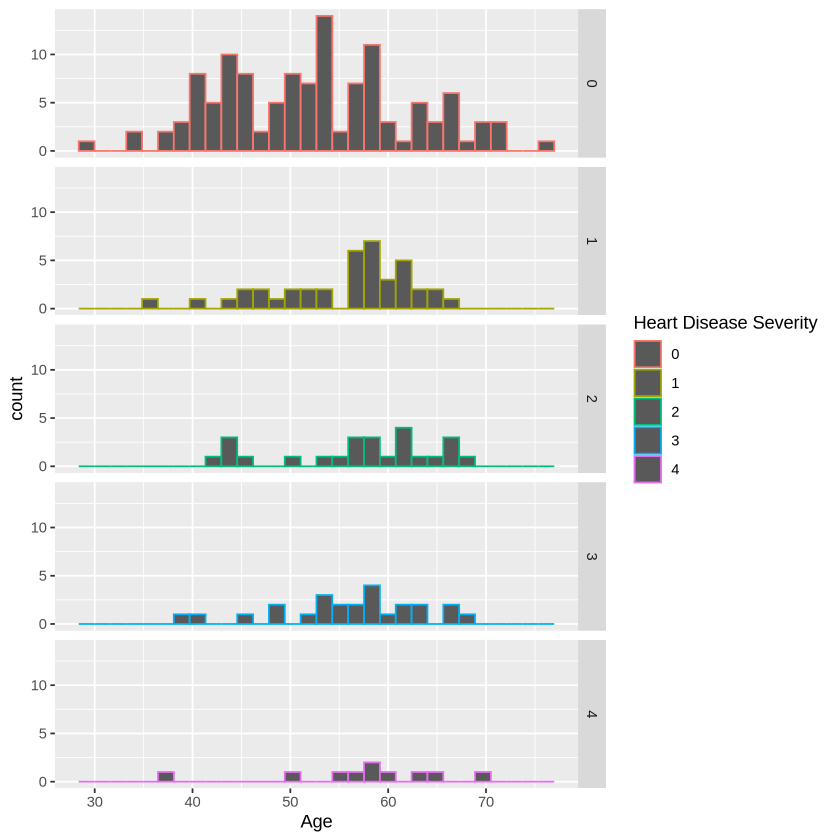

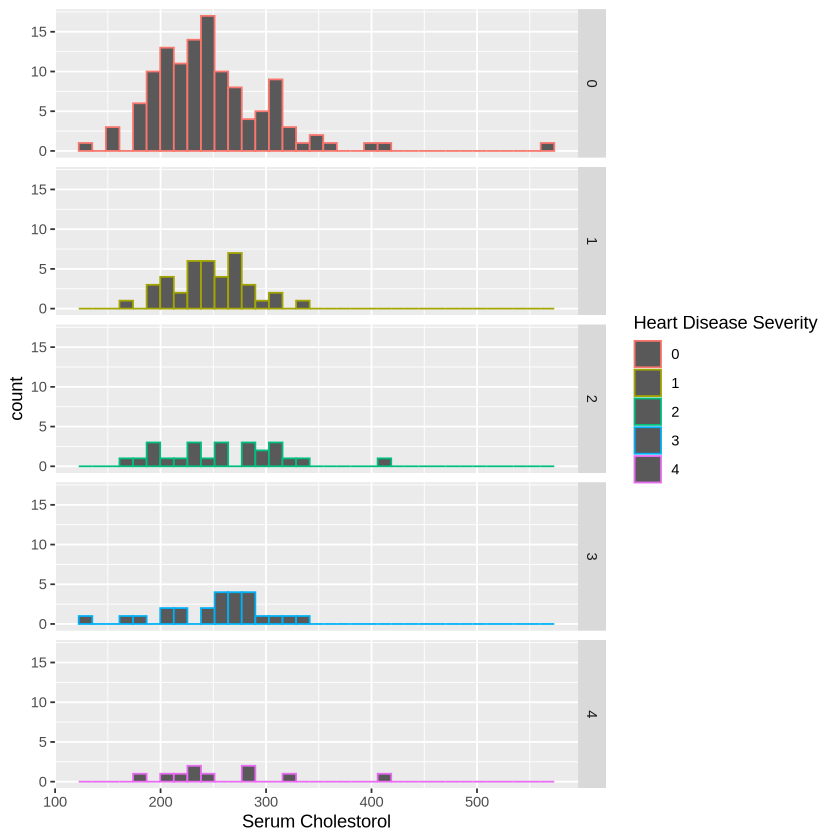

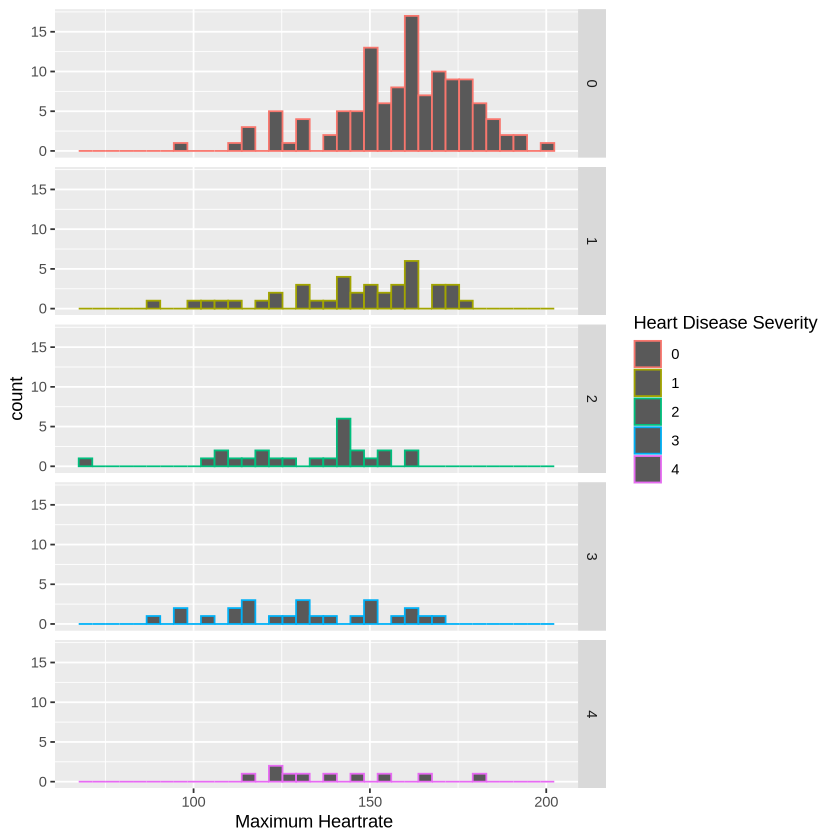

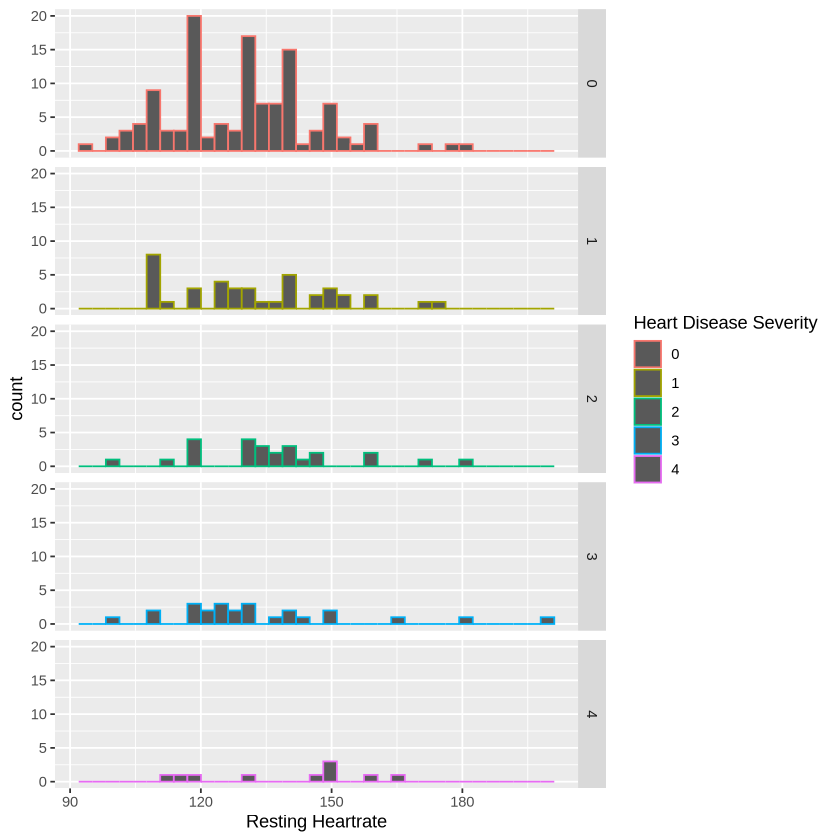

In [15]:
#splits for analysis
heart_split <- initial_split(heart_data, prop = 0.75, strata = num)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#plotting two of our variables 
age_plot <- ggplot(heart_train, aes(x= age, color = num)) +
geom_histogram(position = "identity")+
facet_grid(rows = vars(num))+
labs(x = "Age", color = "Heart Disease Severity")
age_plot

chol_plot <- ggplot(heart_train, aes(x= chol, color = num)) +
geom_histogram(position = "identity", bins=35)+
facet_grid(rows = vars(num))+
labs(x = "Serum Cholestorol", color = "Heart Disease Severity")
chol_plot

thalach_plot <- ggplot(heart_train, aes(x= thalach, color = num)) +
geom_histogram(position = "identity", bins=35)+
facet_grid(rows = vars(num))+
labs(x = "Maximum Heartrate ", color = "Heart Disease Severity")
thalach_plot

trestbps_plot <- ggplot(heart_train, aes(x= trestbps, color = num)) +
geom_histogram(position = "identity", bins=35)+
facet_grid(rows = vars(num))+
labs(x = "Resting Heartrate", color = "Heart Disease Severity")
trestbps_plot

We can see that in each case, as the severity of the heart disease increases (1-4), the median as well as the general distribution of the plot shifts to varying degrees. this indicates that these variables will be useful for classification. 

**Methods:**


- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


We will separate the heart disease dataset into training and testing portions, then train a model using the data that classifies for heart disease severity based on Age, Cholestorol, resting blood pressure, and maximum heart rate. We will determine the best K value to use for this classification through cross validation. We will then use the testing data to examine the accuracy, recall, and precision of the model. 

We will include the four given histogram grids to justify our choice of variables. Beyond the given visualizations above \, we will also include a confusion matrix. 

**Expected outcomes and significance:**


- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?



Simply, We expect to get the likelihood of a person having heart disease.
In more detail,
- We hope to determine if our chosen variables will be able to predict the severity of heart disease with accuracy.
- Understanding Risk: Seeing who is more likely to have heart problems.

The Impacts of understanding the relationships between these variables and modeling them include:
- Better Treatments: Suggestions for more personalized care based on what worked for others.
- Predicting Health: Guessing how someone's heart health might change, to help stop problems before they start.
- Faster Identification: Using KNN in devices for fast health updates, helping keep an eye on heart health in real time.

The largest questions that this form of classification would pose include:
- What other variables could improve the accuracy of the model
- Would it be more reasonable to tune for recall/precision?
